<a href="https://colab.research.google.com/github/ramapriyakj/ML6/blob/master/tensorflow_ml6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
data_set_dir = root_dir + 'Colab Notebooks/dataset/data/'

Mounted at /content/gdrive


In [0]:
import os
import cv2
import numpy as np

def create_data_with_labels(image_dir):
    """Gets numpy data and label array from images that are in the folders that are
    in the folder which was given as a parameter. The folders that are in that folder
    are identified by the mug they represent and the folder name starts with the label."""
    mug_dirs = [f for f in os.listdir(image_dir) if not f.startswith('.')]
    mug_files = []

    for mug_dir in mug_dirs:
        mug_image_files = [image_dir + mug_dir + '/' + '{0}'.format(f)
                           for f in os.listdir(image_dir + mug_dir) if not f.startswith('.')]
        mug_files += [mug_image_files]

    num_images = len(mug_files[0])
    images_np_arr = np.empty([len(mug_files), num_images, 64, 64, 3], dtype=np.float32)

    for mug, _ in enumerate(mug_files):
        for mug_image in range(num_images):
            img = cv2.imread(mug_files[mug][mug_image])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.astype(np.float32)
            images_np_arr[mug][mug_image] = img / 255.

    data = images_np_arr[0]
    labels = np.full(num_images, int(mug_dirs[0][0]))

    for i in range(1, len(mug_dirs)):
        data = np.append(data, images_np_arr[i], axis=0)
        labels = np.append(labels, np.full(num_images, int(mug_dirs[i][0])), axis=0)

    return data, labels

In [3]:
def read_train_data():
  global train_data
  global train_labels  
  (train_data, train_labels) = create_data_with_labels(data_set_dir+"train/")
  print("Train ",train_data.shape,train_labels.shape)

def read_eval_data():
  global eval_data
  global eval_labels
  (eval_data, eval_labels) = create_data_with_labels(data_set_dir+"test/")
  print("Eval ",eval_data.shape,eval_labels.shape)
  
read_train_data()
read_eval_data()

Train  (2000, 64, 64, 3) (2000,)
Eval  (1000, 64, 64, 3) (1000,)


In [0]:
import matplotlib.pyplot as plt

def printResults(history):
  loss = history['loss']
  accuracy = history['accuracy']
  epochs = range(len(loss))
  
  plt.figure()
  plt.plot(epochs, loss, 'b', label='loss')
  plt.title('loss')
  plt.show()
  
  plt.figure()
  plt.plot(epochs, accuracy, 'b', label='accuracy')
  plt.title('accuracy')
  plt.show()

In [0]:
"""This file contains all the model information: the training steps, the batch size and the model iself."""
import math
import tensorflow as tf

def get_training_steps():
    """Returns the number of batches that will be used to train your solution.
    It is recommended to change this value."""
    return 3000

def get_batch_size():
    """Returns the batch size that will be used by your solution.
    It is recommended to change this value."""
    return 20
	
def getModel(features):
  # Input Layer (a batch of images that have 64x64 pixels and are RGB colored (3)
  model = tf.reshape(features["x"], [-1, 64, 64, 3])
  
  model = tf.layers.Conv2D(128,3,activation=tf.nn.relu)(model)
  model = tf.layers.Conv2D(128,3,activation=tf.nn.relu)(model)
  model = tf.layers.MaxPooling2D(2,2)(model)
  
  model = tf.layers.Conv2D(32,1,activation=tf.nn.relu)(model)
  model = tf.layers.Conv2D(32,1,activation=tf.nn.relu)(model)
  model = tf.layers.MaxPooling2D(2,2)(model)
  
  model = tf.layers.Conv2D(32,2,activation=tf.nn.relu)(model)
  model = tf.layers.Conv2D(32,2,activation=tf.nn.relu)(model)
  model = tf.layers.MaxPooling2D(2,2)(model)
  
  model = tf.layers.Conv2D(32,1,activation=tf.nn.relu)(model)
  model = tf.layers.Conv2D(32,1,activation=tf.nn.relu)(model)
  model = tf.layers.MaxPooling2D(2,2)(model)
  
  model = tf.layers.Flatten()(model)
  
  model = tf.layers.Dense(512,activation=tf.nn.relu)(model)
  model = tf.layers.Dropout(0.4)(model)
  
  model = tf.layers.Dense(128,activation=tf.nn.relu)(model)
  model = tf.layers.Dropout(0.1)(model)
  
  model = tf.layers.Dense(64,activation=tf.nn.relu)(model)
  model = tf.layers.Dropout(0.1)(model)
  
  model = tf.layers.Dense(4)(model)
  return model

def solution(features, labels, mode):
    logits = getModel(features)
    
    predictions = {
      "classes": tf.argmax(input=logits, axis=1),
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
        
    if mode == tf.estimator.ModeKeys.PREDICT:
      return tf.estimator.EstimatorSpec(mode=mode,predictions=predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
		
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.contrib.opt.AdamWOptimizer(0.001)
        train_op = optimizer.minimize(loss=loss,global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
      
    eval_metric_ops = {"accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])}

    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(mode=mode,loss=loss,eval_metric_ops=eval_metric_ops)

Using TensorFlow backend.


Size =  2000 ,total_size =  60000
4000 (4000, 64, 64, 3) (4000,)
6000 (6000, 64, 64, 3) (6000,)
8000 (8000, 64, 64, 3) (8000,)
10000 (10000, 64, 64, 3) (10000,)
12000 (12000, 64, 64, 3) (12000,)
14000 (14000, 64, 64, 3) (14000,)
16000 (16000, 64, 64, 3) (16000,)
18000 (18000, 64, 64, 3) (18000,)
20000 (20000, 64, 64, 3) (20000,)
22000 (22000, 64, 64, 3) (22000,)
24000 (24000, 64, 64, 3) (24000,)
26000 (26000, 64, 64, 3) (26000,)
28000 (28000, 64, 64, 3) (28000,)
30000 (30000, 64, 64, 3) (30000,)
32000 (32000, 64, 64, 3) (32000,)
34000 (34000, 64, 64, 3) (34000,)
36000 (36000, 64, 64, 3) (36000,)
38000 (38000, 64, 64, 3) (38000,)
40000 (40000, 64, 64, 3) (40000,)
42000 (42000, 64, 64, 3) (42000,)
44000 (44000, 64, 64, 3) (44000,)
46000 (46000, 64, 64, 3) (46000,)
48000 (48000, 64, 64, 3) (48000,)
50000 (50000, 64, 64, 3) (50000,)
52000 (52000, 64, 64, 3) (52000,)
54000 (54000, 64, 64, 3) (54000,)
56000 (56000, 64, 64, 3) (56000,)
58000 (58000, 64, 64, 3) (58000,)
60000 (60000, 64, 64, 3

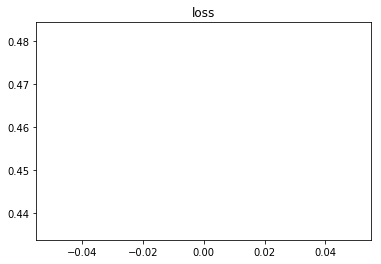

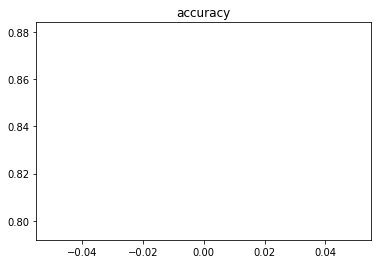

In [6]:
import argparse
import os
import tensorflow as tf
from tensorflow.contrib.training.python.training import hparam
from keras.preprocessing.image import ImageDataGenerator

def train_model(params):
  
    size = len(train_data)
    total_size = get_training_steps()*get_batch_size()    
    print("Size = ",size,",total_size = ",total_size)
    
    train_datagen = ImageDataGenerator(width_shift_range=0.4,height_shift_range=0.4,shear_range=0.2,zoom_range=0.1,channel_shift_range=0.2,fill_mode='nearest')
    train_generator = train_datagen.flow(train_data,train_labels,batch_size=size)
    
    td,tl = next(train_generator)
    i = size
    while i < total_size:
        next_td,next_tl = next(train_generator)
        td = np.concatenate([td,next_td])
        tl = np.concatenate([tl,next_tl])
        i += size
        print(i,td.shape,tl.shape)
        
    print("The shape is :",td.shape,tl.shape)
    
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": td},
        y=tl,
        batch_size=get_batch_size(),
        num_epochs=None,
        shuffle=True)
    
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": eval_data},
        y=eval_labels,
        num_epochs=1,
        shuffle=False)

    estimator = tf.estimator.Estimator(model_fn=solution)

    steps_per_eval = int(get_training_steps() / params.eval_steps)
    
    history = {}
    history["loss"] = []
    history["accuracy"]= []
    for _ in range(params.eval_steps):
        estimator.train(train_input_fn, steps=steps_per_eval)
        eval_results = estimator.evaluate(eval_input_fn)
        print(eval_results)
        history["loss"].append(eval_results["loss"])
        history["accuracy"].append(eval_results["accuracy"])
    printResults(history)
        
class pp:
  eval_steps = 1

tf.logging.set_verbosity('ERROR')
HPARAMS = pp()
train_model(HPARAMS)

In [7]:
a = np.array([[[2,2],[2,2]],[[2,2],[2,2]],[[2,2],[2,2]]])
b = np.array([[[2,2],[2,2]],[[2,2],[2,2]]])
c = np.concatenate([a,b])
print(a.shape,b.shape,c.shape)

(3, 2, 2) (2, 2, 2) (5, 2, 2)
